# RNN Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Data can be downloaded from: 
# http://archive.ics.uci.edu/ml/machine-learning-databases/00235/

In [2]:
df = pd.read_csv('exampleDatasets/data_lstm.txt',
                 sep = ';',
                 parse_dates = { 'dt' : ['Date', 'Time']},
                 infer_datetime_format = True, 
                 low_memory = False, 
                 na_values = ['nan', '?'], 
                 index_col = 'dt')

In [3]:
df.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [4]:
for col_number in range(0, 7):
    df.iloc[:, col_number] = df.iloc[:, col_number] \
                               .fillna(df.iloc[:, col_number].mean())

Note that we have timestamps as index. Maybe resample to daily instead? Try using sum and mean in daily resampling.

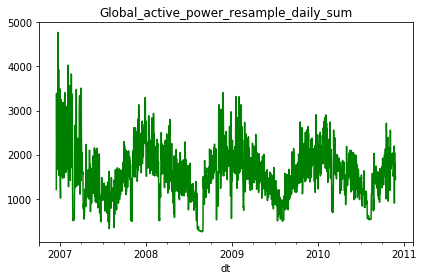

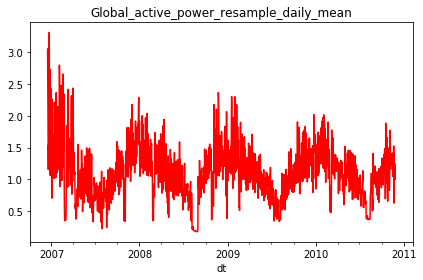

In [5]:
df.Global_active_power.resample('D') \
                      .sum() \
                      .plot(title = 'Global_active_power_resample_daily_sum',
                            color = 'green')
plt.tight_layout()
plt.show()
df.Global_active_power.resample('D') \
                      .mean() \
                      .plot(title = 'Global_active_power_resample_daily_mean',
                            color = 'red')
plt.tight_layout()
plt.show()

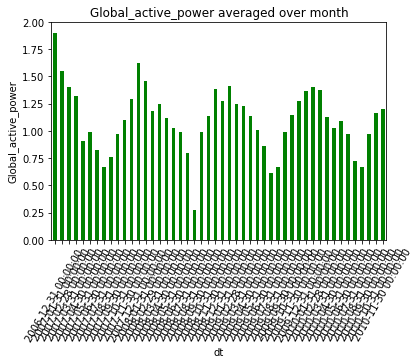

In [6]:
df.Global_active_power \
  .resample('M') \
  .mean() \
  .plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power averaged over month')
plt.show()

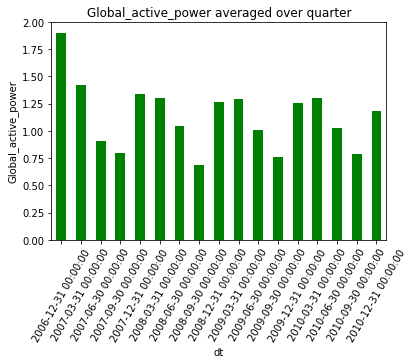

In [7]:
df.Global_active_power \
  .resample('Q') \
  .mean() \
  .plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power averaged over quarter')
plt.show()

Note that differen resampling periods will display different levels of periodicity. For example, larger time intervals like quarters will diminish the periodicity of system.

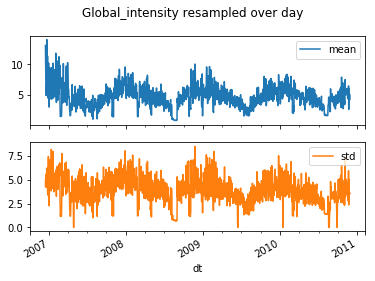

In [8]:
df.Global_intensity \
  .resample('D') \
  .agg(['mean', 'std']) \
  .plot(subplots = True, 
        title = 'Global_intensity resampled over day')
plt.show()

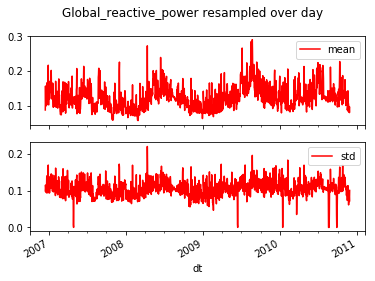

In [9]:
df.Global_reactive_power \
  .resample('D') \
  .agg(['mean', 'std']) \
  .plot(subplots = True,
        title = 'Global_reactive_power resampled over day',
        color = 'red')
plt.show()

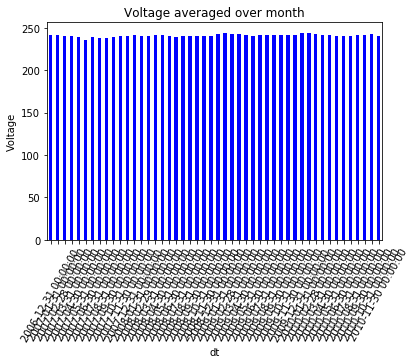

In [10]:
df.Voltage \
  .resample('M') \
  .mean() \
  .plot(kind = 'bar', color = 'blue')
plt.xticks(rotation = 60)
plt.ylabel('Voltage')
plt.title('Voltage averaged over month')
plt.show()
# Basically constant mean for voltage

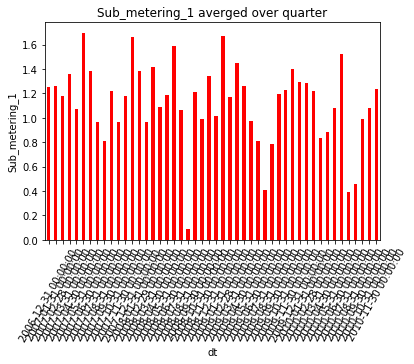

In [11]:
df.Sub_metering_1 \
  .resample('M') \
  .mean() \
  .plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 averged over quarter')
plt.show()

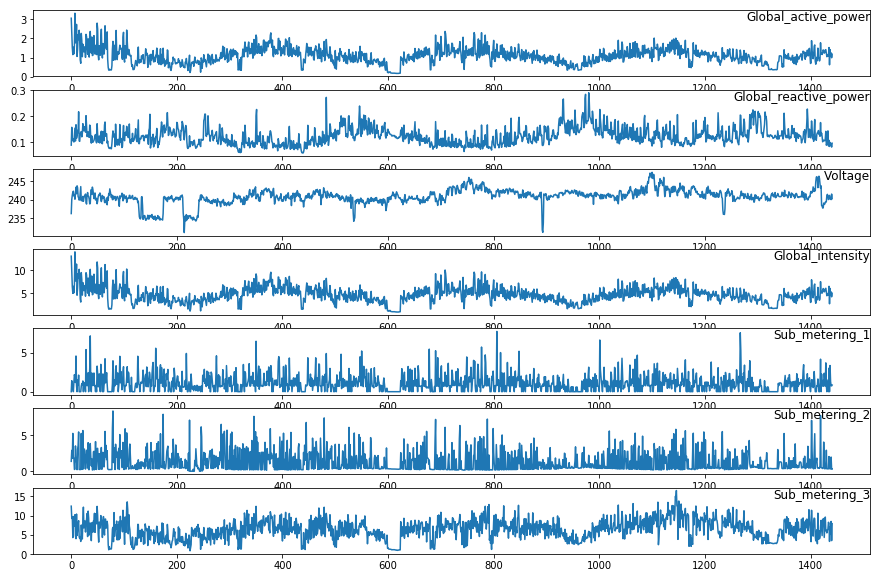

In [12]:
cols = [0, 1, 2, 3, 4, 5, 6]
i = 1
groups = cols
values = df.resample('D').mean().values
plt.figure(figsize = (15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y = 0.75, loc = 'right')
    i += 1
plt.show()

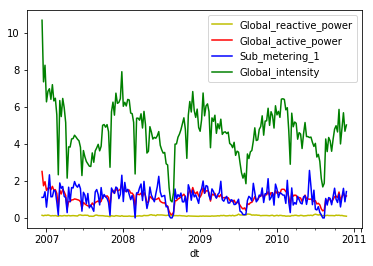

In [13]:
df.Global_reactive_power.resample('W').mean().plot(color = 'y', legend = True)
df.Global_active_power.resample('W').mean().plot(color = 'r', legend = True)
df.Sub_metering_1.resample('W').mean().plot(color = 'b', legend = True)
df.Global_intensity.resample('W').mean().plot(color = 'g', legend = True)
plt.show()

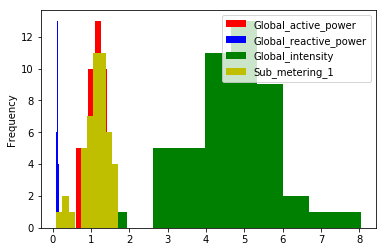

In [14]:
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


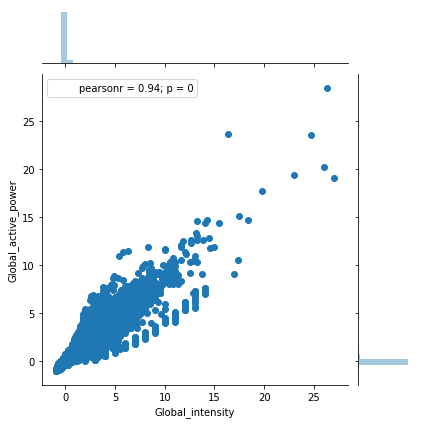

In [15]:
import seaborn as sns
# Plot the changes in global intensity against global active power
# Can see that those 2 are quote positively correlated
data_returns = df.pct_change()
sns.jointplot(x = 'Global_intensity',
              y = 'Global_active_power', 
              data = data_returns)
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


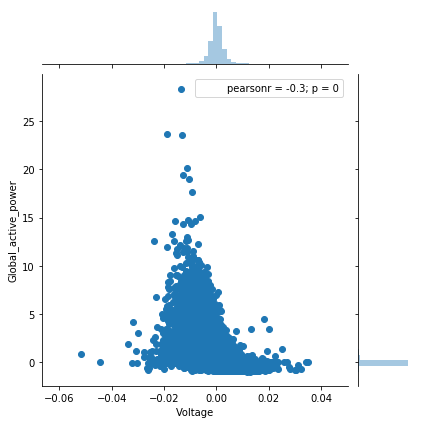

In [16]:
sns.jointplot(x = 'Voltage',
              y = 'Global_active_power',
              data = data_returns)
plt.show()

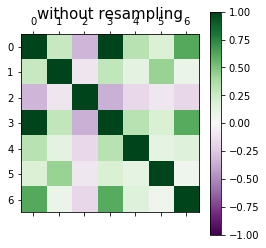

In [17]:
# Correlations among columns no resampling
plt.matshow(df.corr(method = 'spearman'),
            vmax = 1,
           vmin = -1,
           cmap = 'PRGn')
plt.title('without resampling', size = 15)
plt.colorbar()
plt.show()

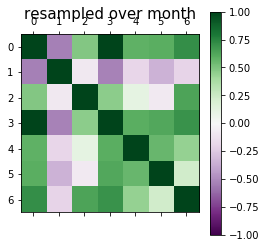

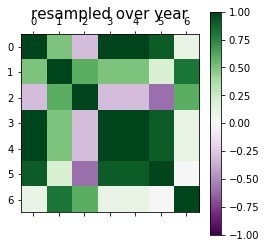

In [18]:
plt.matshow(df.resample('M').mean().corr(method = 'spearman'),
           vmax = 1,
           vmin = -1,
           cmap = 'PRGn')
plt.title('resampled over month', size = 15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method = 'spearman'),
           vmax = 1,
           vmin = -1,
           cmap = 'PRGn')
plt.title('resampled over year', size = 15)
plt.colorbar()
plt.show()

Note that different frequencies of resampling have quite different results on correlations

In [19]:
# Now its time to frame the problem as a supervised learning problem
# It predicts global_active_power (t)  given global_active_power (t-1)

In [20]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
    # i in range 1 to 0 going backwards
    # This will get me all the t-1 values for 7 features
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [21]:
# Resample over hour to save time

df_resample = df.resample('h').mean()

In [28]:
values = df_resample.values

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [30]:
scaled = scaler.fit_transform(values)

In [25]:
reframed = series_to_supervised(scaled, 1, 1)

In [26]:
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())
# Note that you have all 7 t-1 feautres and the response at time t

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


Can see that there are 7 input variables and 1 output variable which is just the current time's values

In [27]:
values = reframed.values
n_train_time = 365 * 24 # A years worth of data for training
train = values[:n_train_time, :]
test = values[n_train_time:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Input reshaped to (samples, timesteps, features)
# Why does LSTM expect a 3d input?
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


In [28]:
# Model architecture
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

model = Sequential()
model.add(LSTM(100, input_shape = (train_X.shape[1],
                                  train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


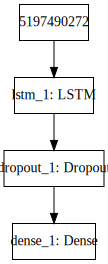

In [29]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog = 'dot', format = 'svg'))

In [30]:
history = model.fit(train_X, train_y, epochs = 20, batch_size = 70,
                   validation_data = (test_X, test_y),
                   verbose = 2, shuffle = False)

Train on 8760 samples, validate on 25828 samples
Epoch 1/20
 - 1s - loss: 0.0216 - val_loss: 0.0120
Epoch 2/20
 - 1s - loss: 0.0128 - val_loss: 0.0108
Epoch 3/20
 - 1s - loss: 0.0116 - val_loss: 0.0099
Epoch 4/20
 - 1s - loss: 0.0110 - val_loss: 0.0094
Epoch 5/20
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 6/20
 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 7/20
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 8/20
 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 9/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 10/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 11/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 12/20
 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 13/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 14/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 15/20
 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 16/20
 - 1s - loss: 0.0104 - val_loss: 0.0092
Epoch 17/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 18/20
 - 1s - loss: 0.0104 - val_loss: 0.0093
Epoch 19/20
 - 1s - loss

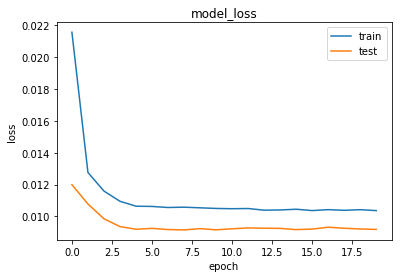

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [35]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Invert the scaling for forecasting

inv_yhat = np.concatenate([yhat, test_X[:, -6:]], axis = 1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# Invert scaling for actual

test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate([test_y, test_X[:, -6:]], axis = 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))

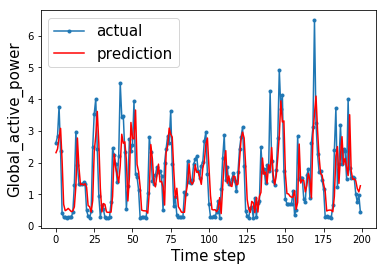

In [39]:
aa = [x for x in range(200)]
plt.plot(aa, inv_y[:200], marker = '.', label = 'actual')
plt.plot(aa, inv_yhat[:200], 'r', label = 'prediction')
plt.ylabel('Global_active_power', size = 15)
plt.xlabel('Time step', size = 15)
plt.legend(fontsize = 15)
plt.show()